### Bayesian Linear Model
$$ f(x) = w_1+w_2x$$
Assume that the prior distribution of the weight is, 
$$p(\mathbf{w})=\mathcal{N}(0,\mathbf{I})$$
The observed data is given by,
$$y=f(x)+\epsilon$$
where $\epsilon \sim \mathcal{N}(0,\sigma^2)$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import multivariate_normal
import math
from numpy.linalg import inv
from numpy import matmul as mm
import scipy
from scipy.linalg import lu_factor,lu_solve
from scipy.linalg import cho_factor,cho_solve
from scipy.stats import multivariate_normal

In [2]:
w1, w2 = np.mgrid[-2:2:.02, -2:2:.02]
pos = np.dstack((w1, w2))

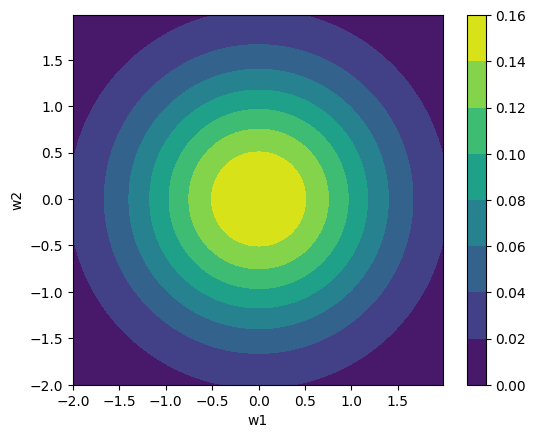

In [3]:
rv = multivariate_normal([0,0], [[1., 0.], [0., 1.]])
fig = plt.figure()
ax = fig.add_subplot(111)
cs = ax.contourf(w1,w2,rv.pdf(pos))
ax.set_xlabel('w1')
ax.set_ylabel('w2')
fig.colorbar(cs)
ax.set_aspect(1)

### Posterior 
$$p(\mathbf{w}|\mathbf{X},\mathbf{y})\sim\mathcal{N}(\frac{1}{\sigma^2}A^{-1}Xy,A^{-1})$$
where $A = \sigma^{-2}XX^\top+\mathbf{I}$.

In [4]:
x = np.array([[1,1,1],[-5,2,5]])
w = np.random.randn(1,2)
n = np.random.randn(1,3)
print(x.shape, w.shape, n.shape)
y = mm(w,x) + n
print(y.shape)

(2, 3) (1, 2) (1, 3)
(1, 3)


In [5]:
print(w)

[[-0.28359844 -0.41008702]]


In [6]:
A = mm(x,x.T)+np.identity(2)
# lu,piv = lu_factor(A)
tmp = lu_solve(lu_factor(A), x)
print(tmp.shape)
w_est = mm(tmp,y.T).T
w_cov_est = inv(A)
print(w_est.shape, w_cov_est.shape)

(2, 3)
(1, 2) (2, 2)


Actual weights:  [[-0.28359844 -0.41008702]]
Estimated weights:  [[-0.31251846 -0.30733782]]


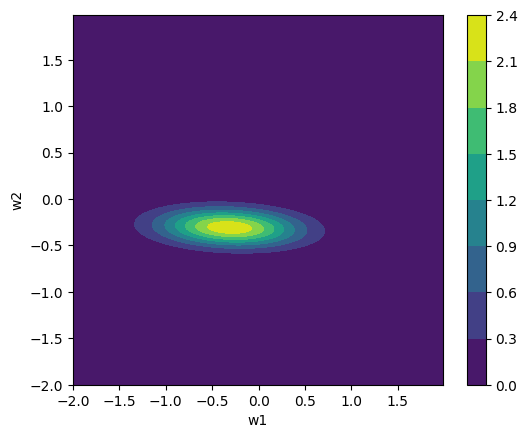

In [7]:
rv = multivariate_normal(w_est.squeeze(), w_cov_est)
fig = plt.figure()
ax = fig.add_subplot(111)
cs = ax.contourf(w1,w2,rv.pdf(pos))
ax.set_xlabel('w1')
ax.set_ylabel('w2')
fig.colorbar(cs)
ax.set_aspect(1)
print('Actual weights: ',w)
print('Estimated weights: ',w_est)

### Likelihood
$$p(\mathbf{y}|X,\mathbf{w}) = \mathcal{N}(X^\top\mathbf{w},\sigma^2\mathbf{I})$$

In [8]:
sum_of_diff = 0
for i, x_ in enumerate(x[1]):
    print(x_, y[0,i])
    sum_of_diff+=(y[0, i]-x_*w2-w1)**2
print(sum_of_diff.shape)

-5 0.8847048220920518
2 -0.21405959893276127
5 -2.5353946979941075
(200, 200)


Actual weights:  [[-0.28359844 -0.41008702]]
Estimated weights:  [[-0.31251846 -0.30733782]]


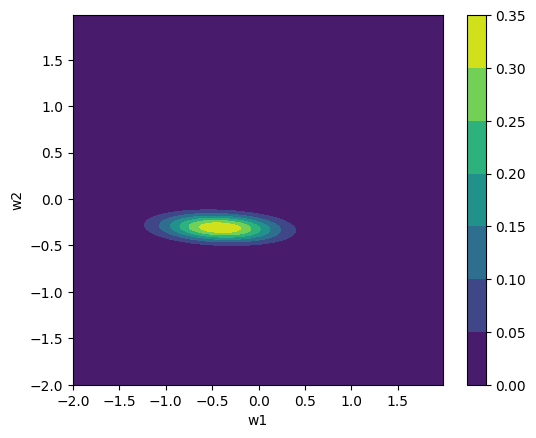

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
cs = ax.contourf(w1,w2,np.exp(-sum_of_diff))
ax.set_xlabel('w1')
ax.set_ylabel('w2')
fig.colorbar(cs)
ax.set_aspect(1)
print('Actual weights: ',w)
print('Estimated weights: ',w_est)

### Predictive distribution
$$p(f_*|x_*,X,y) = \mathcal{N}(\sigma^{-2}x_*^\top A^{-1}Xy,x^\top_*A^{-1}x_*)$$

In [10]:
xt = np.linspace(-7,7,100)
xt = np.vstack((np.ones(100),xt))
f_est = mm(w_est,xt)
print(xt.shape)
f_cov_est = mm(xt.T,lu_solve(lu_factor(A), xt))
print(f_est.shape, f_cov_est.shape)

(2, 100)
(1, 100) (100, 100)


In [11]:
unc = np.sqrt(np.diag(f_cov_est))
print(unc.shape)

(100,)


In [12]:
print(xt[1].shape, x[1].shape, 
     f_est.shape,y.shape)

(100,) (3,) (1, 100) (1, 3)


In [13]:
unc.shape

(100,)

(-7.0, 7.0)

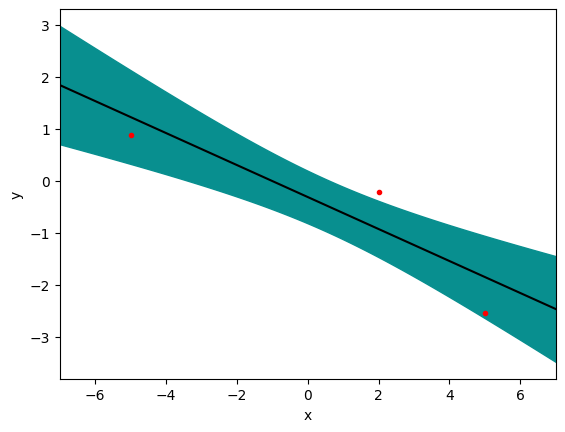

In [14]:
plt.fill_between(xt[1],
    f_est.squeeze()-unc,f_est.squeeze()+unc,
    color='#088F8F')
plt.plot(xt[1],f_est.squeeze(),'k-')
plt.plot(x[1],y.squeeze(),'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-7,7])
